# Cas Kaggle: Spotify Music DataBase
## Anàlisi de les cançons presents a la base de dades de Spotify

_Important: Si heu descarregat aquest fitxer desde GitHub, el fitxer .csv de la BBDD es trova comprimit en el directori /data/ per tal de reduïrne el seu pes, descomprimir-lo en el mateix directori abans d'executar qualsevol part del codi._

[Enllaç al repositori de GitHub] (https://github.com/Megaguille11/CasKaggle_Spotify)

## Objectius

Els objectius d'aquesta pràctica són:
* Entendre els diferents atributs de la base de dades.
* Visualitzar la correlació que els atributs tenen respecte el nostre atribut objectiu.
* Crear un model classificador sobre la acústica d'una cançó a partir d'altres atributs.

## Introducció

Com ja s'ha especificat en el títol, la base de dades seleccionada per a aquest projecte és la corresponent a les cançons que es troben dins la plataforma de música en streaming Spotify, la qual per a cada entrada, és a dir, per a cada cançó, té guardats els següents atributs:

* _genre_: Gènere musical al qual pertany la cançó.
* _atrist_name_: Nom de artista autor de la cançó.
* _track_name_: Nom de la cançó.
* _track_id_: Identificador únic assignat a una cançó en concret.
* _popularity_: Popilaritat de la cançó entre els usuaris que l'han escoltada (Enter en el rang (0, 100)).
* _acousticness_: Mesura de confiança sobre si la cançó és acústica o no (Decimal en el rang (0, 1)).
* _danceability_: Mesura de com de bona és la cançó per a ser ballada, basat en elements musicals de la propia (Decimal en el rang (0, 1)).
* _duration_ms_: Duració de la cançó, expresada en milisegons.
* _energy_: Mesura que representa la percepció general sobre la intensitat i activitat d'una cançó, amb l'exemple d'una cançó de heavy metal puntuant alt en aquesta categoria i un preludi de Bachuntuant baix (Decimal en el rang (0, 1)).
* _instrumentalness_: Probabilitat que la cançó no sigui cantada (tractant expressions com "Ooh" i "aah" com a part instrumental. Decimal en el rang (0, 1)).
* _key_: Clau musical en la que la cançó ha estat composta.
* _liveness_: Probabilitat de que la cançó sigui una grabació del artista tocan amb públic (Decimal en el rang (0, 1)).
* _loudness_: La intensitat sonora mitjana d'una cançó mesurada en decibels (Normalment en el rang (-60, 0)).
* _mode_: Modalitat de la cançó (Major o Menor).
* _speechiness_: Presència de paraules parlades en una cançó, sent cançons amb valors contigut com podcasts o poesia recitada (Decimal en el rang (0, 1)).
* _tempo_: La estimació del tempo mitjà d'una cançó, mesurat en BPM (pulsacions per minut).
* _time_signature_: Estimació del compàs de la cançó, és a dir, en número de pulsacions d'aquesta per cada unitat de mesura.
* _valence_: Mesura del "positivisme" de la cançó, a major valor, més alegre i eufòrica és la cançó (Decimal en el rang (0, 1)). 

En el notre cas, establirem com a variable objectiu l'anomenada acousticness, sobre la qual crearem un model classificador que sigui capaç de decidir si una cançó és acústica o no.

## Tractament de les dades

Primerament, començarem per carregar la nostra base de dades:

In [1]:
from sklearn.datasets import make_regression
import numpy as np
import pandas as pd
%matplotlib notebook
from matplotlib import pyplot as plt
%matplotlib inline 
import scipy.stats
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.model_selection import train_test_split

# Visualitzarem només 3 decimals per mostra
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Funcio per a llegir dades en format csv
def load_dataset(path):
    dataset = pd.read_csv(path, header=0, delimiter=',')
    return dataset

# Carreguem dataset d'exemple
dataset = load_dataset('../data/SpotifyFeatures.csv')
data = dataset.values

x = dataset.drop(columns = ['acousticness'])
y = dataset['acousticness']

print("Dimensionalitat de la BBDD:", dataset.shape)
print("Dimensionalitat de les entrades X", x.shape)
print("Dimensionalitat de l'atribut Y", y.shape)

Dimensionalitat de la BBDD: (232725, 18)
Dimensionalitat de les entrades X (232725, 17)
Dimensionalitat de l'atribut Y (232725,)


Un cop carregada, farem un primera comprovació per buscar si existeixen entrades amb algun valor NULL en la base de dades.

In [2]:
print("Número de valors no existents per cada atribut de la BBDD:")
print(dataset.isnull().sum())

Número de valors no existents per cada atribut de la BBDD:
genre               0
artist_name         0
track_name          0
track_id            0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64


Ara que ja sebem que no tenim cap valor NULL en la base de dades, podem fer una primera visualització de quin format tenen les entrades referent les diferents cançons dins la base de dades i alguns estadístics dels nostres atributs numèrics: 

In [3]:
print("Exemple de 10 entrades aleatòries de la BBDD:")
dataset.sample(10)

Exemple de 10 entrades aleatòries de la BBDD:


genre      artist_name                   track_name  \
165755         Reggaeton   Carlitos Rossy                    Tu Veneno   
182540             Movie          Voctave      It Is Well With My Soul   
136449            Reggae         Lady Saw                        Beg U   
47520              Blues       Jack White                  Three Women   
139637         Reggaeton       Miky Woodz                No Hay Limite   
146661              Jazz  Ella Fitzgerald           My Funny Valentine   
27133        Alternative             Ween                   Baby Bitch   
183534             Movie      Alan Menken  Fireworks - Remastered 2014   
99428   Children’s Music      Foreign Air                   Loud Magic   
32501              Anime          GReeeeN                           歩み   

                      track_id  popularity  acousticness  danceability  \
165755  3cWgVqkdJkbfSsmXnPS7lv          19         0.136         0.713   
182540  5e71DXE9EOU9EZJOa3x4VY          31         0.988         0.213   
136449  5qB4fCK7sMsDoqdVsxKGQn          33         0.089         0.715   
47520   67xazpRk0c0JXNbOx8MkJD          37         0.106         0.326   
139637  42DnWYnKXxOA2fMSG9zmLY          55         0.146         0.817   
146661  0uqoRVmmU2WM9iDgQBf23R          51         0.939         0.210   
27133   26adeQG9Ytsh3aUUkN9mo8          39         0.373         0.487   
183534  0G8LVMCIO6bY0PUaxdyOxl          19         0.694         0.545   
99428   5gAC4dyUhRY9ibLg7ePZ39          56         0.018         0.483   
32501   1xmA2dHJgjHNIJtODvwEmj          36         0.222         0.662   

        duration_ms  energy  instrumentalness key  liveness  loudness   mode  \
165755       290680   0.707             0.000   B     0.132    -6.956  Minor   
182540       271813   0.188             0.000   E     0.090   -14.302  Major   
136449       176960   0.603             0.000  A#     0.136    -6.341  Major   
47520        237947   0.704             0.000  C#     0.091    -8.507  Major   
139637       202147   0.699             0.000  C#     0.116    -5.129  Major   
146661       235200   0.186             0.000   G     0.179   -14.136  Minor   
27133        184067   0.331             0.000  F#     0.247   -14.201  Minor   
183534       131773   0.091             0.005   G     0.122   -19.518  Major   
99428        204627   0.828             0.000  C#     0.104    -5.293  Major   
32501        252227   0.778             0.000   C     0.130    -6.763  Major   

        speechiness   tempo time_signature  valence  
165755        0.087 128.016            4/4    0.173  
182540        0.035  77.658            3/4    0.089  
136449        0.697 125.004            5/4    0.579  
47520         0.051 180.365            4/4    0.812  
139637        0.082  76.498            4/4    0.642  
146661        0.034  76.320            4/4    0.158  
27133         0.036 150.278            3/4    0.341  
183534        0.048 125.609            4/4    0.291  
99428         0.034  89.992            4/4    0.426  
32501         0.040  89.954            4/4    0.707

In [4]:
print("Estadístiques dels atributs numèrics de la BD:")
dataset.describe()

Estadístiques dels atributs numèrics de la BD:


popularity  acousticness  danceability  duration_ms     energy  \
count  232725.000    232725.000    232725.000   232725.000 232725.000   
mean       41.128         0.369         0.554   235122.339      0.571   
std        18.190         0.355         0.186   118935.909      0.263   
min         0.000         0.000         0.057    15387.000      0.000   
25%        29.000         0.038         0.435   182857.000      0.385   
50%        43.000         0.232         0.571   220427.000      0.605   
75%        55.000         0.722         0.692   265768.000      0.787   
max       100.000         0.996         0.989  5552917.000      0.999   

       instrumentalness   liveness   loudness  speechiness      tempo  \
count        232725.000 232725.000 232725.000   232725.000 232725.000   
mean              0.148      0.215     -9.570        0.121    117.667   
std               0.303      0.198      5.998        0.186     30.899   
min               0.000      0.010    -52.457        0.022     30.379   
25%               0.000      0.097    -11.771        0.037     92.959   
50%               0.000      0.128     -7.762        0.050    115.778   
75%               0.036      0.264     -5.501        0.105    139.054   
max               0.999      1.000      3.744        0.967    242.903   

         valence  
count 232725.000  
mean       0.455  
std        0.260  
min        0.000  
25%        0.237  
50%        0.444  
75%        0.660  
max        1.000

A partir d'aquests estadístics, ja podem comprovar que en la base de dades tenim outliers, ja que veiem que la duració de la cançó més llarga és de 5552917 ms, que és igual a 92.5 minuts, i pel nostre cas no ens interesa, ja que pràcticament ningú l'escoltarà sencer d'una vegada. Per tant, he decidit eliminar aquelles entrades que tinguin duració superior a 10 minuts (900.000ms).

També he decidit eliminar aquelles entrades amb valors de popularitat igual a 0, ja que és practicament impossible (per no dir impossible) que una cançó no agradi a ningú i poden ser cançons relativament noves i que pràcticament no s'hagin reproduït gaire encara.

A més, també podem veure en el camp de loudness existeix com a mínim una entrada amb un valor per sobre de 0dB, que teòricament hauria de ser el valor màxim que una cançó podria prendre, per tant, també he eliminat aquelles entrades que el seu valor de loudness superi els 0dB.

In [5]:
dataset = dataset.drop(dataset[dataset['duration_ms'] > 900000].index)
dataset = dataset.drop(dataset[dataset['duration_ms'] > 900000].index)
dataset = dataset.drop(dataset[dataset['loudness'] > 0].index)
dataset = dataset.drop(dataset[dataset['popularity'] == 0].index)
dataset.describe()

popularity  acousticness  danceability  duration_ms     energy  \
count  225765.000    225765.000    225765.000   225765.000 225765.000   
mean       42.315         0.359         0.554   232885.382      0.577   
std        17.071         0.352         0.185    89022.512      0.261   
min         1.000         0.000         0.057    16640.000      0.000   
25%        30.000         0.035         0.436   184320.000      0.398   
50%        44.000         0.220         0.571   221070.000      0.613   
75%        55.000         0.702         0.691   265827.000      0.791   
max       100.000         0.996         0.989   899933.000      0.999   

       instrumentalness   liveness   loudness  speechiness      tempo  \
count        225765.000 225765.000 225765.000   225765.000 225765.000   
mean              0.146      0.215     -9.432        0.121    117.754   
std               0.301      0.199      5.920        0.185     30.904   
min               0.000      0.010    -52.457        0.022     30.379   
25%               0.000      0.097    -11.522        0.037     92.978   
50%               0.000      0.128     -7.649        0.050    115.909   
75%               0.033      0.264     -5.456        0.105    139.418   
max               0.999      1.000      0.000        0.967    242.903   

         valence  
count 225765.000  
mean       0.453  
std        0.259  
min        0.000  
25%        0.237  
50%        0.442  
75%        0.657  
max        1.000

Ara que ja hem tractat els outliers en atributs numèrics, ens toca tractar els atributs categòrics, en el nostre cas, ens tocarà passar els atributs key, mode i time_signature a valors numèrics.

Primer, treballarem amb el atribut key, on seguirem la seva posició en la distribució de classe de tons per a assignar-li un valor.

Les assignacions seran les següents:

| Tonalitat | Valor assignat |
|-----------|:-----------:|
| C | 0 |
| C# | 1 |
| D |  2 |
| D# | 3 |
| E |  4 |
| F | 5 |
| F# | 6 |
| G | 7 |
| G# | 8 |
| A | 9 |
| A# | 10 |
| B | 11 |

In [6]:
claus = dataset['key'].unique()
valors_claus = [1, 6, 0, 5, 7, 4, 3, 2, 10, 8, 9, 11]

for i in range(len(claus)):
    dataset.loc[dataset['key'] == claus[i], 'key'] = valors_claus[i]

Segon, canviarem els valors de mode, convertint els valors de mode Minor a 0 i els Major a 1:

In [7]:
modes = dataset['mode'].unique()
valors_modes = [1, 0]

for i in range(len(modes)):
    dataset.loc[dataset['mode'] == modes[i], 'mode'] = valors_modes[i]

Finalment, assignarem valors numèrics per a cada un dels diferents tipus de compàs disponibles, seguint el criteri següent:

| Compàs | Valor assignat |
|-----------|:-----------:|
| 0/4 | 0 |
| 1/4 | 1 |
| 3/4 | 2 |
| 4/4 | 3 |
| 5/4 | 4 |

In [8]:
compas = dataset['time_signature'].unique()
valors_compas = [3, 4, 2, 1, 0]

for i in range(len(compas)):
    dataset.loc[dataset['time_signature'] == compas[i], 'time_signature'] = valors_compas[i]

Ara ja tenim tots els valors que ens podrien interessar de la base de dades en valors numèrics. Fem una comprovació que això es compleix mirant-ne 10 entrades aleatòries:

In [9]:
dataset.sample(10)

genre              artist_name               track_name  \
112021          Pop                   Future                 No Issue   
46162         Blues           The Raconteurs     What's Yours is Mine   
225439         Rock               Cosmo Pyke             Social Sites   
2962    Alternative                    6LACK               Loaded Gun   
89585       Hip-Hop             Rae Sremmurd             Lit Like Bic   
156144         Rock             Van Morrison  Bright Side Of The Road   
85925           R&B           James Morrison                 Glorious   
181212         Jazz         Acoustic Alchemy              Tete A Tete   
10686   Alternative  Bullet For My Valentine            Hand Of Blood   
145441         Jazz              Norah Jones           Don't Know Why   

                      track_id  popularity  acousticness  danceability  \
112021  7L95O7D34EWhwtDCQkwGMR          65         0.114         0.818   
46162   03HNXKZdOcRebskQCebuKI          49         0.006         0.451   
225439  0puyikpyVwe8TTv2tvMHeq          59         0.109         0.411   
2962    1wb7Mqon4o1ViLjaLV9f8U          59         0.113         0.643   
89585   5pQR7OLdUPZBvrp7H0Ol8h          54         0.006         0.725   
156144  4TF9sFoqsKPSkgD1L3zd4d          48         0.287         0.528   
85925   42koekU2TEdkBOGaVx8fGz          38         0.084         0.421   
181212  6IyRjoc5ahgENiLFHs7U3w          29         0.539         0.623   
10686   5JWDt4NZNiZQR8iMenaa7h          45         0.000         0.375   
145441  6ybViy2qrO9sIi41EgRJgx          75         0.883         0.732   

        duration_ms  energy  instrumentalness key  liveness  loudness mode  \
112021       184960   0.443             0.000   0     0.412   -11.444    1   
46162        169022   0.770             0.137   9     0.096    -6.081    0   
225439       289309   0.618             0.000   3     0.279    -4.964    1   
2962         198442   0.545             0.000   5     0.124    -6.526    1   
89585        274760   0.673             0.000   6     0.441    -5.014    1   
156144       227173   0.652             0.000   6     0.240    -9.667    0   
85925        204053   0.702             0.000   0     0.089    -6.195    1   
181212       283773   0.630             0.829   8     0.095   -10.156    1   
10686        217453   0.985             0.000  10     0.070    -2.754    0   
145441       186147   0.198             0.000   0     0.066   -11.775    0   

        speechiness   tempo time_signature  valence  
112021        0.404  74.491              3    0.722  
46162         0.087 105.844              3    0.483  
225439        0.047 120.734              3    0.211  
2962          0.089 128.023              3    0.286  
89585         0.049 124.011              3    0.126  
156144        0.050 176.864              3    0.857  
85925         0.040  76.016              3    0.356  
181212        0.042  88.004              3    0.275  
10686         0.094  94.468              3    0.455  
145441        0.028  88.174              3    0.618

Abans de continuar, aprofitarem per a normalitzar les nostres dades i eliminar les columnes inicials referents al gènere, el nom del artista, el nom de la cançó i la seva id, ja que no treballarem amb cap d'aquests valors.

In [10]:
index_dataset = dataset.drop(columns = ['genre', 'artist_name', 'track_name', 'track_id'])
normalitzat = (index_dataset - index_dataset.mean()) / index_dataset.std()
normalitzat.head()

popularity  acousticness  danceability  duration_ms  energy  \
1      -2.420        -0.322         0.193       -1.073   0.611   
2      -2.303         1.686         0.588       -0.703  -1.709   
4      -2.244         1.680        -1.209       -1.688  -1.349   
6      -2.362        -0.044         0.804       -0.231  -1.177   
7      -1.600         1.649        -0.749        0.081  -1.181   

   instrumentalness    key  liveness  loudness   mode  speechiness  tempo  \
1            -0.486 -1.353    -0.323     0.654  1.358       -0.182  1.820   
2            -0.486  0.150    -0.565    -0.751  1.358       -0.456 -0.591   
4            -0.077 -1.653    -0.066    -1.979 -0.736       -0.405  0.738   
6            -0.486 -0.151    -0.555    -0.548 -0.736        4.498 -1.129   
7            -0.486 -1.353    -0.515     0.082 -0.736       -0.497 -0.677   

  time_signature  valence  
1          0.254    1.402  
2          2.779   -0.329  
4          0.254   -0.244  
6          0.254    0.308  
7          0.254   -0.693

## Data mining

Primerament, podem fer una visualització de la distribució de l'acústica que tenim:

Text(0, 0.5, 'Freqüència')

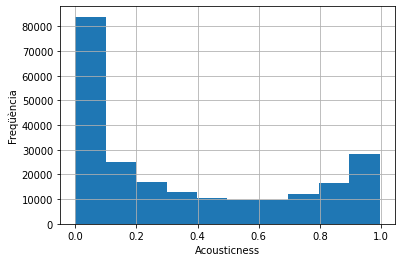

In [11]:
dataset['acousticness'].hist(bins=10)
plt.xlabel("Acousticness", fontsize=10)
plt.ylabel("Freqüència",fontsize=10)

Com es pot veure en el gràfic, tenim la majoria de valors distribuits en el itèrval (0, 0.4) com es podria esperar, ja que la majoria de cançons són cantades o amb presència de paraules.

A partir d'aqui, podem visualitzar la matriu de correlació entre els diferentys atributs de la base de dades:

In [12]:
normalitzat.corr()

popularity  acousticness  danceability  duration_ms  energy  \
popularity             1.000        -0.361         0.287        0.013   0.216   
acousticness          -0.361         1.000        -0.367       -0.013  -0.720   
danceability           0.287        -0.367         1.000       -0.129   0.327   
duration_ms            0.013        -0.013        -0.129        1.000  -0.025   
energy                 0.216        -0.720         0.327       -0.025   1.000   
instrumentalness      -0.220         0.317        -0.367        0.077  -0.382   
liveness              -0.188         0.071        -0.039        0.012   0.197   
loudness               0.349        -0.689         0.441       -0.035   0.814   
speechiness           -0.165         0.155         0.133       -0.064   0.151   
tempo                  0.083        -0.239         0.017       -0.012   0.229   
valence                0.086        -0.335         0.541       -0.160   0.447   

                  instrumentalness  liveness  loudness  speechiness  tempo  \
popularity                  -0.220    -0.188     0.349       -0.165  0.083   
acousticness                 0.317     0.071    -0.689        0.155 -0.239   
danceability                -0.367    -0.039     0.441        0.133  0.017   
duration_ms                  0.077     0.012    -0.035       -0.064 -0.012   
energy                      -0.382     0.197     0.814        0.151  0.229   
instrumentalness             1.000    -0.134    -0.514       -0.176 -0.104   
liveness                    -0.134     1.000     0.047        0.517 -0.051   
loudness                    -0.514     0.047     1.000       -0.000  0.229   
speechiness                 -0.176     0.517    -0.000        1.000 -0.082   
tempo                       -0.104    -0.051     0.229       -0.082  1.000   
valence                     -0.311     0.015     0.406        0.023  0.131   

                  valence  
popularity          0.086  
acousticness       -0.335  
danceability        0.541  
duration_ms        -0.160  
energy              0.447  
instrumentalness   -0.311  
liveness            0.015  
loudness            0.406  
speechiness         0.023  
tempo               0.131  
valence             1.000

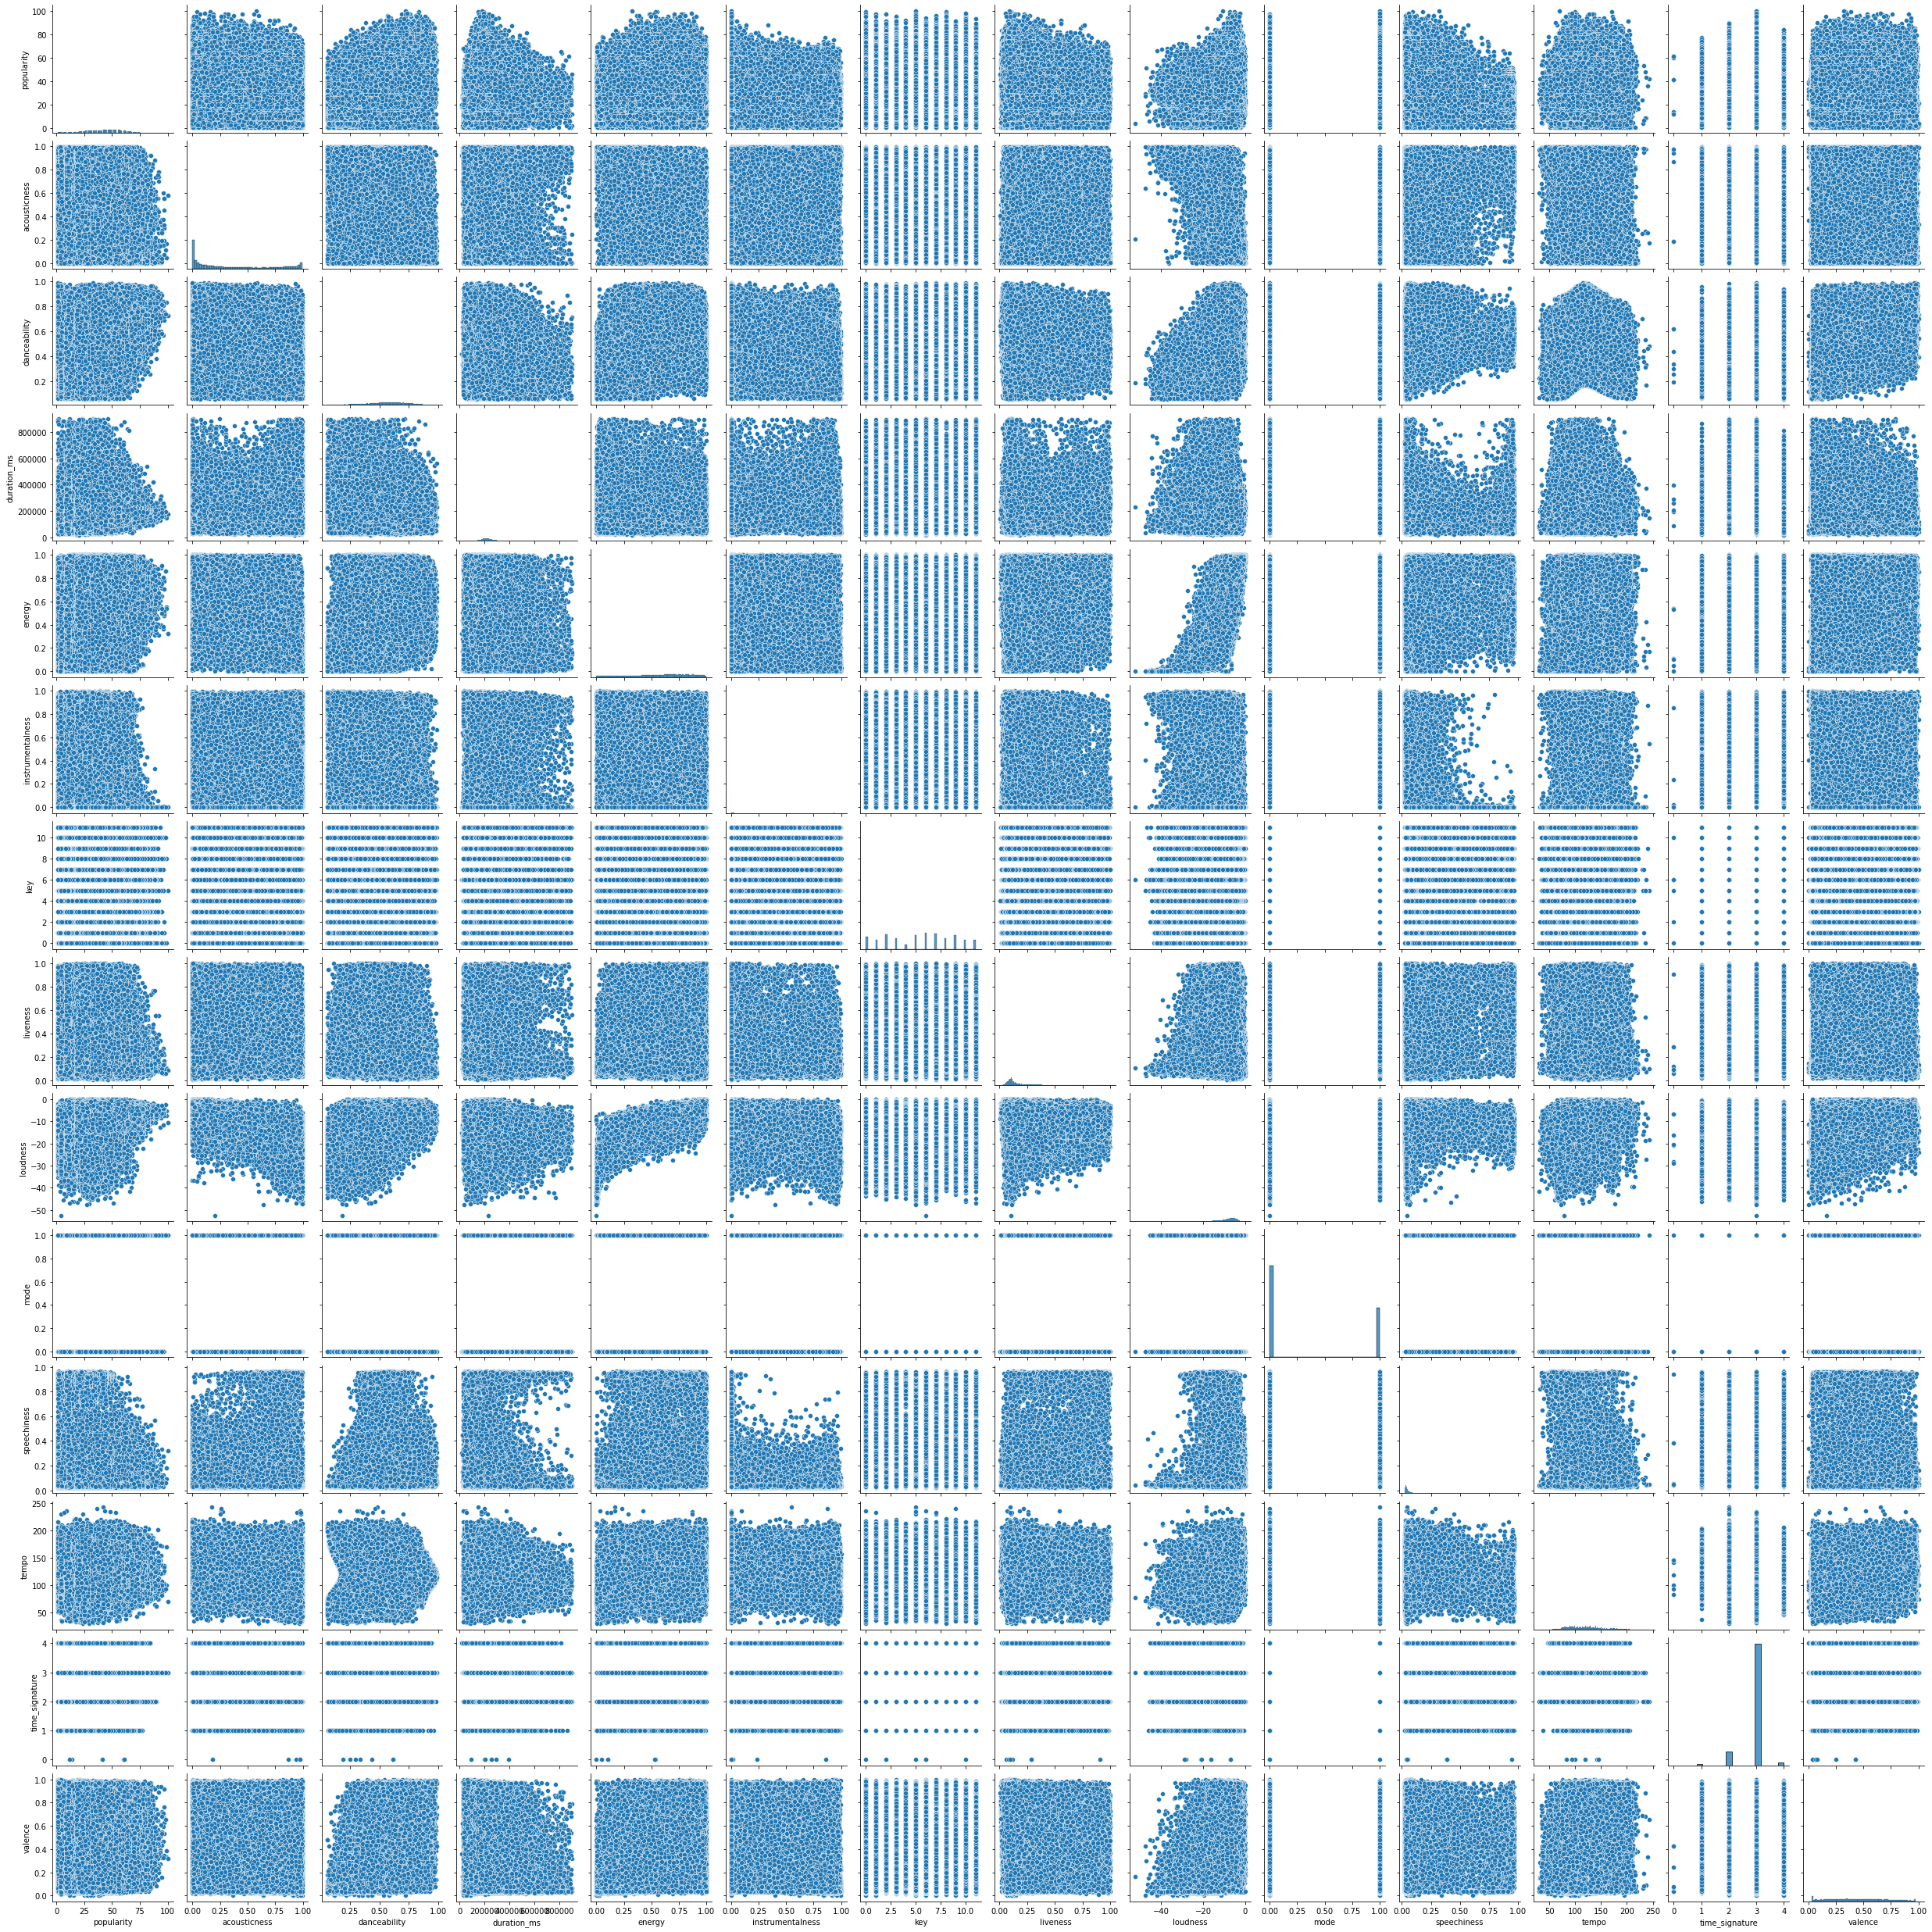

In [13]:
sns.pairplot(dataset)

Amb aquests resultats, podem veure que els atributs que tenen més relació a priori amb la acústica són els de energy i el de loudness de forma inversa, cosa que ens fa pensar que poden ser els dos atributs més importants a l'hora de crear el nostre model.

Podem visualitzar la relació amb loudness de manera més clara:

Text(0.5, 1.0, 'Loudness de totes les cançons de la BBDD')

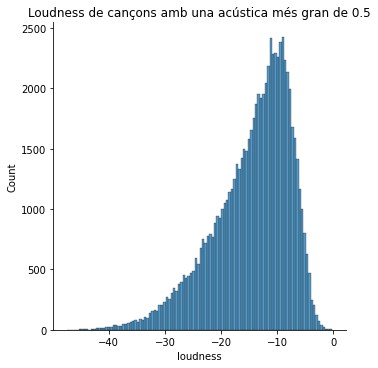

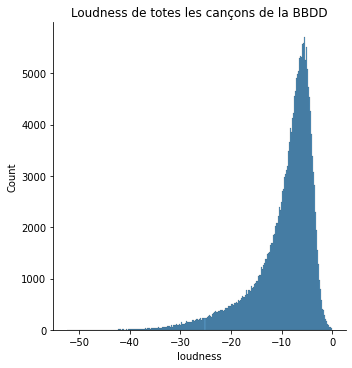

In [14]:
subset = dataset[dataset['acousticness'] > 0.5]

sns.displot(subset['loudness'])
plt.title('Loudness de cançons amb una acústica més gran de 0.5')
sns.displot(dataset['loudness'])
plt.title('Loudness de totes les cançons de la BBDD')

Com es pot apreciar, tenim que totes aquelles cançons amb un valor de loudness baix, també tenen un valor de acústica elevat, i essent aquelles cançons amb valors de loudness més elevats les que no tenen un alta probabilitat de ser acústiques.

Ara que ja hem vist la relació dels diferents atributs amb la acústica, farem una última modificació als valors d'aquesta en la base de dades, i els canviarem a 0 i 1, classificant aquella cançó com a acústica si la seva probabilitat és igual o major de 0.5, i com a no acústica si el seu valor és inferior.

In [15]:
dataset.loc[dataset['acousticness'] >= 0.5, 'acousticness'] = 1
dataset.loc[dataset['acousticness'] < 0.5, 'acousticness'] = 0

normalitzat['acousticness'] = dataset['acousticness']

normalitzat.sample(5)

popularity  acousticness  danceability  duration_ms  energy  \
209762       0.040         1.000        -1.220        1.457  -1.422   
170642      -1.131         1.000        -0.408       -1.713   0.561   
67057        1.915         0.000         0.593       -0.290   0.331   
151743       0.919         0.000         0.533       -0.764   0.595   
232568      -0.546         0.000         0.571        1.285  -0.672   

        instrumentalness    key  liveness  loudness   mode  speechiness  \
209762            -0.486  0.450    -0.693    -0.021 -0.736       -0.449   
170642            -0.486 -0.151     2.950    -0.171 -0.736        4.050   
67057             -0.470  0.450    -0.560     0.562 -0.736       -0.439   
151743            -0.486  0.450     1.414     0.806 -0.736       -0.450   
232568            -0.486 -0.451     0.085     0.212  1.358       -0.455   

        tempo time_signature  valence  
209762  0.193          0.254   -1.331  
170642  0.726          0.254   -0.434  
67057   1.907          0.254   -1.017  
151743  0.852          0.254   -0.411  
232568  0.198          0.254   -1.315

A partir d'aqui, ja podem començar a preparar les dades per al nostre model regressor. Per fer-ho, dividirem la nostre base de dades entre el set d'entrenament i el set de test, utilitzant el 80% per l'entrenament i el 20% restant per efectuar els test.

In [16]:
training_data, testing_data = train_test_split(normalitzat, test_size=0.2, random_state=25)
y_trainVal = training_data['acousticness']
x_trainVal = training_data.drop(columns = ['acousticness'])
y_test = testing_data['acousticness']
x_test = testing_data.drop(columns = ['acousticness'])

## Model learning

Per al nostre problema, necessitarem fer ús d'algun model classificador, en aquest cas, utilitzarem el model de regressió logística per a la generació del nostre model classificador.

Un cop tenim dividides les dades en test i entrenament, podem començar a crear el nostre model, però com es pot donar el cas que amb una sola configuració de les dades d'entrenament tiguem massa overfitting, tornarem a separar les dades d'entrenament en dos conjunt més seleccionades aleatòriament, les d'entrenament definitives i les corresponents al set de validació. Aquesta separació aleatòria la repetirem 5 vegades i ens quedarem com a model definitiu aquell que ens ofereixi els millors resultats a l'hora d'utilitzar el set de validació per a comprovar el seu funcionament amb les dades de test.

Tornarem a separar el conjunt de validació i entrenament en un 20% i un 80% respectivament sobre la primera separació inicial.

In [17]:
n_models = 5
model_def = LogisticRegression()
max_val = 0

for i in range(n_models):
    seed = 22*2*i
    x_train, x_val, y_train, y_val = train_test_split(x_trainVal, y_trainVal, test_size=0.2, random_state=seed)

    model = LogisticRegression()
    model.fit(x_train, y_train)
    preds = model.predict(x_val)
    score = model.score(x_val, y_val)
    
    if score > max_val:
        max_val = score
        model_def = model
        
print("Precisió del nostre millor model amb el seu set de validació corresponent:", max_val)

Precisió del nostre millor model amb el seu set de validació corresponent: 0.8691415441685353


In [49]:
model_def.coef_[0][0]

-0.3277069661262691

Un cop ja tenim seleccional el nostre millor model, mostrarem els seus resultats per pantalla:

In [18]:
print("Classes:", model_def.classes_)
print("Bias:", model_def.intercept_[0])
print("Pesos dels atributs:")

i = 0
for col in x_val.columns:
    print(" ", col, ":",  model_def.coef_[0][i])
    i += 1

Classes: [0. 1.]
Bias: -1.0612361096370828
Pesos dels atributs:
  popularity : -0.3277069661262691
  danceability : -0.5600687888658997
  duration_ms : -0.11939016446557983
  energy : -2.0749650921602414
  instrumentalness : 0.05044123684244159
  key : -0.042492961301620766
  liveness : 0.260162381365737
  loudness : -0.2068450495690656
  mode : -0.0684515033982723
  speechiness : 0.7767658148039847
  tempo : -0.1599643741395397
  time_signature : -0.10671202121834222
  valence : 0.28462004511410094


Ara, ja podem fer les nostre prediccions amb el set de dades de test i veure algunes dades respecte els resulatats obtinguts.

Matriu de confusió:
  [27933  2003]
  [ 3871 11346]
Accuracy respecte el set de test: 0.8699089761477643



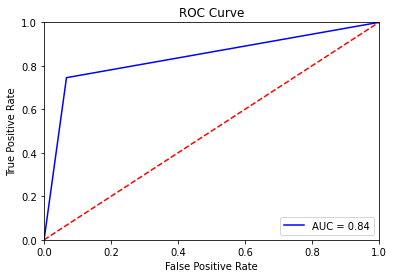

In [19]:
test_predictions = model.predict(x_test)
test_score = model.score(x_test, y_test)
matriu = confusion_matrix(y_test, test_predictions)

print("Matriu de confusió:")
print(" ", matriu[0])
print(" ", matriu[1])
print("Accuracy respecte el set de test:", test_score)
print("")

fpr, tpr, threshold = roc_curve(y_test, test_predictions)
roc_auc = auc(fpr, tpr)

plt.title('ROC Curve')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Anàlisi dels resultats

Un cop que ja hem obtingut els nostres resultats de les prediccions del set de test, podem veure que el nostre model està funcionant bastant bé, ja que estem obtenint una accuracy del 86.99%, juntament amb els resultats de la ROC curve, la qual ens mostra un valor per la AUC de 0.84, el qual és superior a l'àrea delimitada per la línia vermella que representa el valor de 0.5, i que ens corrobora que el model està funcionant correctament i que obtenim millors resultats a l'hora de classificar que si simplement s'assignessin les classes aleatòriament.

A més, si tornem a observar els valors corresponents als pessos associats a cada un dels atributs del nostre model, podem veure que l'atribut amb més pes i, per tant, que el nostre classificador hi ha assignat la major rellevància a l'hora de classificar una mostra és el corresponent a energy que, tal i com ja sospitàvem inicialment per la correlació amb la nostra variable objectiu. Per altra banda, l'atribut loudness que inicialment semblava que també hauria de ser inportant per la correlació vista, finalment no ha tingut del majors pesos, i atributs com speechiness i danceability han acabat agafant més rellevància a l'hora de fer les classificacions.

Per a seguir treballant amb aquest problema, es podria intentar utilitzar altres tipus de models classificadors i buscar si utilitzant algun altre tipus de model es podrien obtenir resultats encara millors als ja obtinguts amb el nostre model de regressió logística.